In [ ]:
"""Imports Required"""

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import norm
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ['PATH']
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

In [ ]:
"""Seaborn plot configuration"""

sns.set_theme(style='ticks', rc={
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 15
})
sns.set_palette('coolwarm')

In [3]:
def bs_put(S, K, T_put, r, sigma):
    S = np.maximum(S, 1e-8)
    T_put = np.maximum(T_put, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T_put) / (sigma * np.sqrt(T_put))
    d2 = d1 - sigma * np.sqrt(T_put)
    return K * np.exp(-r * T_put) * norm.cdf(-d2) - S * norm.cdf(-d1)

def bs_put_delta(S, K, T_put, r, sigma):
    S = np.maximum(S, 1e-8)
    T_put = np.maximum(T_put, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T_put) / (sigma * np.sqrt(T_put))
    return norm.cdf(d1) - 1

def bs_put_gamma(S, K, T_put, r, sigma):
    S = np.maximum(S, 1e-8)
    T_put = np.maximum(T_put, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T_put) / (sigma * np.sqrt(T_put))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T_put))

def bs_call(S, K, T_call, r, sigma):
    S = np.maximum(S, 1e-8)
    T_call = np.maximum(T_call, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T_call) / (sigma * np.sqrt(T_call))
    d2 = d1 - sigma * np.sqrt(T_call)
    return S * norm.cdf(d1) - K * np.exp(-r * T_call) * norm.cdf(d2)

def bs_call_delta(S, K, T_call, r, sigma):
    S = np.maximum(S, 1e-8)
    T_call = np.maximum(T_call, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T_call) / (sigma * np.sqrt(T_call))
    return norm.cdf(d1)

def bs_call_gamma(S, K, T_call, r, sigma):
    S = np.maximum(S, 1e-8)
    T_call = np.maximum(T_call, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T_call) / (sigma * np.sqrt(T_call))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T_call))

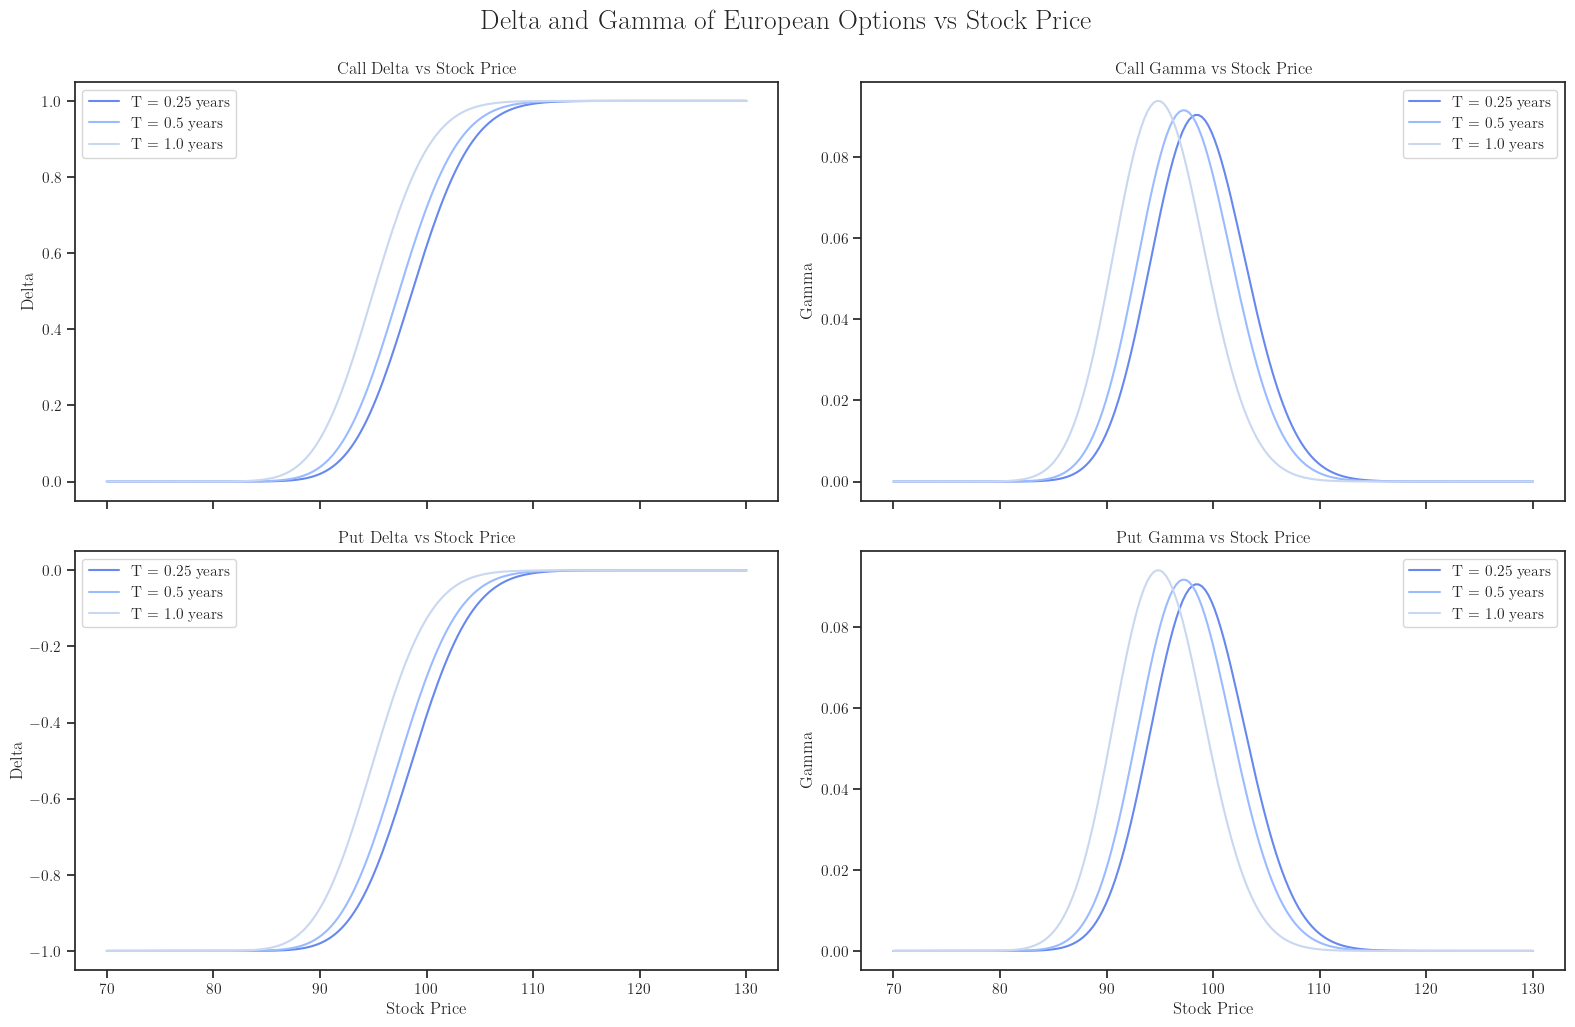

In [ ]:
"""Delta and Gamma Curve Plots Against Different Expirations"""

K = 100
S_vals = np.linspace(0.7 * K, 1.3 * K, 200)
time_to_maturities = [0.25, 0.5, 1.0]

fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for T in time_to_maturities:
    deltas = [bs_call_delta(S, K, 0.05, T, 0.2) for S in S_vals]
    axs[0, 0].plot(S_vals, deltas, label=f'T = {T} years')
axs[0, 0].set_title("Call Delta vs Stock Price")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].legend()

for T in time_to_maturities:
    gammas = [bs_call_gamma(S, K, 0.05, T, 0.2) for S in S_vals]
    axs[0, 1].plot(S_vals, gammas, label=f'T = {T} years')
axs[0, 1].set_title("Call Gamma vs Stock Price")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].legend()

for T in time_to_maturities:
    deltas = [bs_put_delta(S, K, 0.05, T, 0.2) for S in S_vals]
    axs[1, 0].plot(S_vals, deltas, label=f'T = {T} years')
axs[1, 0].set_title("Put Delta vs Stock Price")
axs[1, 0].set_xlabel("Stock Price")
axs[1, 0].set_ylabel("Delta")
axs[1, 0].legend()

for T in time_to_maturities:
    gammas = [bs_put_gamma(S, K, 0.05, T, 0.2) for S in S_vals]
    axs[1, 1].plot(S_vals, gammas, label=f'T = {T} years')
axs[1, 1].set_title("Put Gamma vs Stock Price")
axs[1, 1].set_xlabel("Stock Price")
axs[1, 1].set_ylabel("Gamma")
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle("Delta and Gamma of European Options vs Stock Price", fontsize=20, y=1.03)
plt.show()

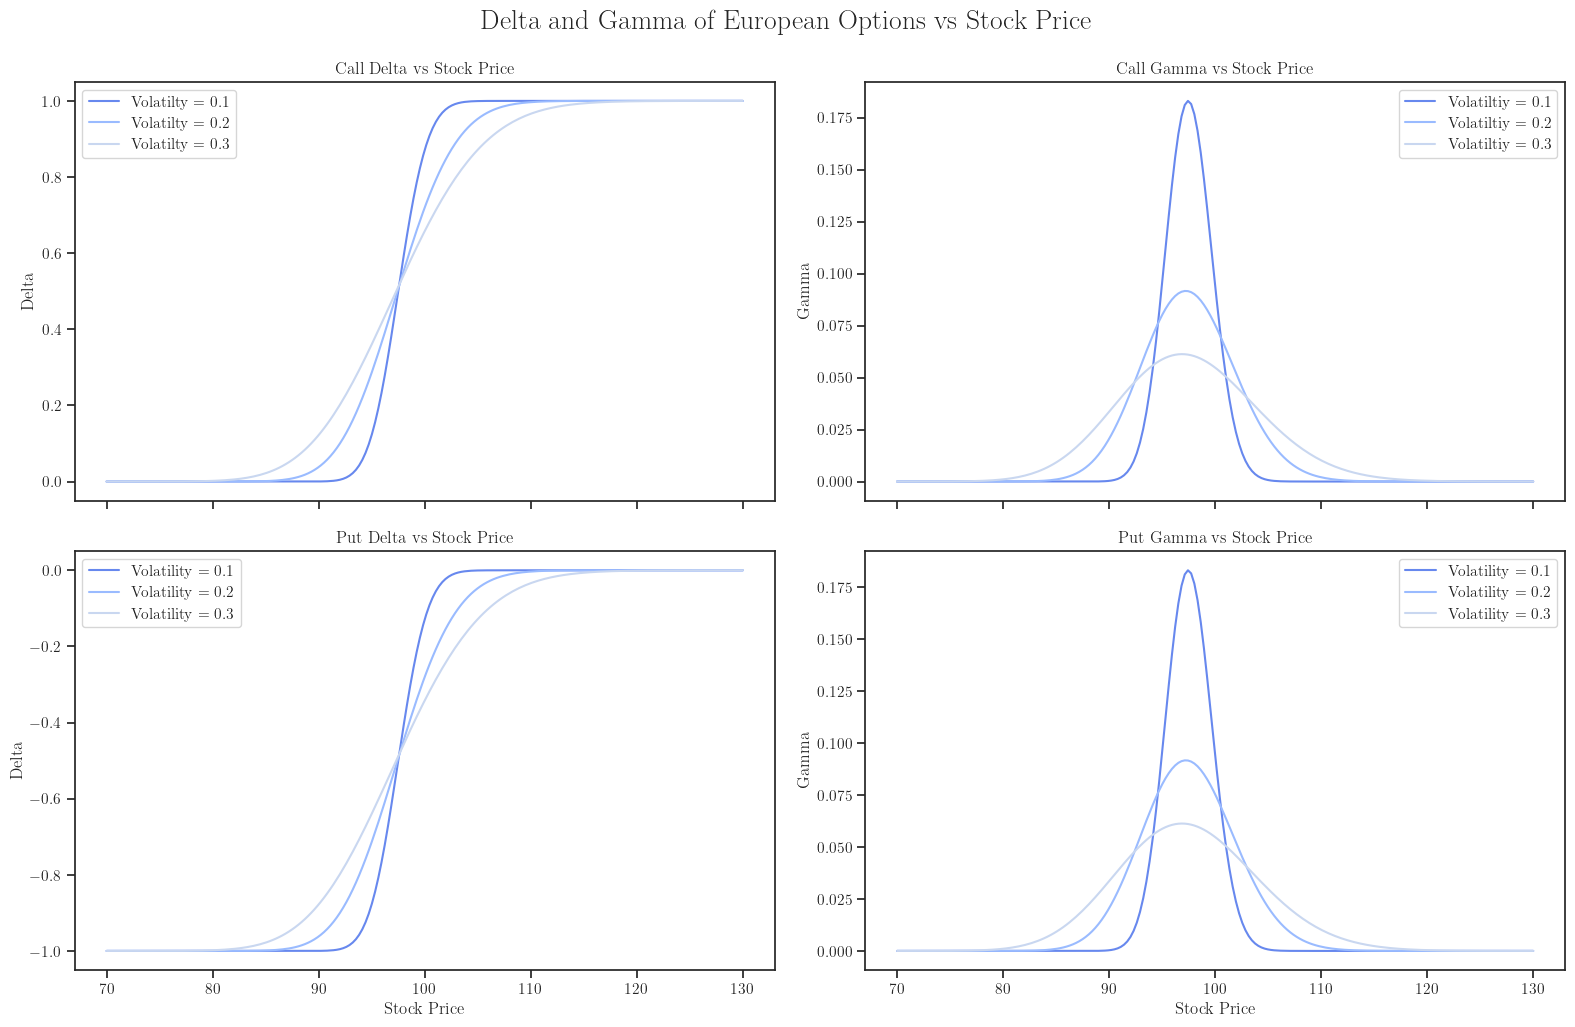

In [ ]:
"""Delta and Gamma Curve Plots Against Different Volatilities"""

K = 100
S_vals = np.linspace(0.7 * K, 1.3 * K, 200)
volatilities = [0.1, 0.2, 0.3]

fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for sigma in volatilities:
    deltas = [bs_call_delta(S, K, 0.05, 0.5, sigma) for S in S_vals]
    axs[0, 0].plot(S_vals, deltas, label=f'Volatilty = {sigma}')
axs[0, 0].set_title("Call Delta vs Stock Price")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].legend()

for sigma in volatilities:
    gammas = [bs_call_gamma(S, K, 0.05, 0.5, sigma) for S in S_vals]
    axs[0, 1].plot(S_vals, gammas, label=f'Volatiltiy = {sigma}')
axs[0, 1].set_title("Call Gamma vs Stock Price")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].legend()

for sigma in volatilities:
    deltas = [bs_put_delta(S, K, 0.05, 0.5, sigma) for S in S_vals]
    axs[1, 0].plot(S_vals, deltas, label=f'Volatility = {sigma}')
axs[1, 0].set_title("Put Delta vs Stock Price")
axs[1, 0].set_xlabel("Stock Price")
axs[1, 0].set_ylabel("Delta")
axs[1, 0].legend()

for sigma in volatilities:
    gammas = [bs_put_gamma(S, K, 0.05, 0.5, sigma) for S in S_vals]
    axs[1, 1].plot(S_vals, gammas, label=f'Volatility = {sigma}')
axs[1, 1].set_title("Put Gamma vs Stock Price")
axs[1, 1].set_xlabel("Stock Price")
axs[1, 1].set_ylabel("Gamma")
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle("Delta and Gamma of European Options vs Stock Price", fontsize=20, y=1.03)
plt.show()

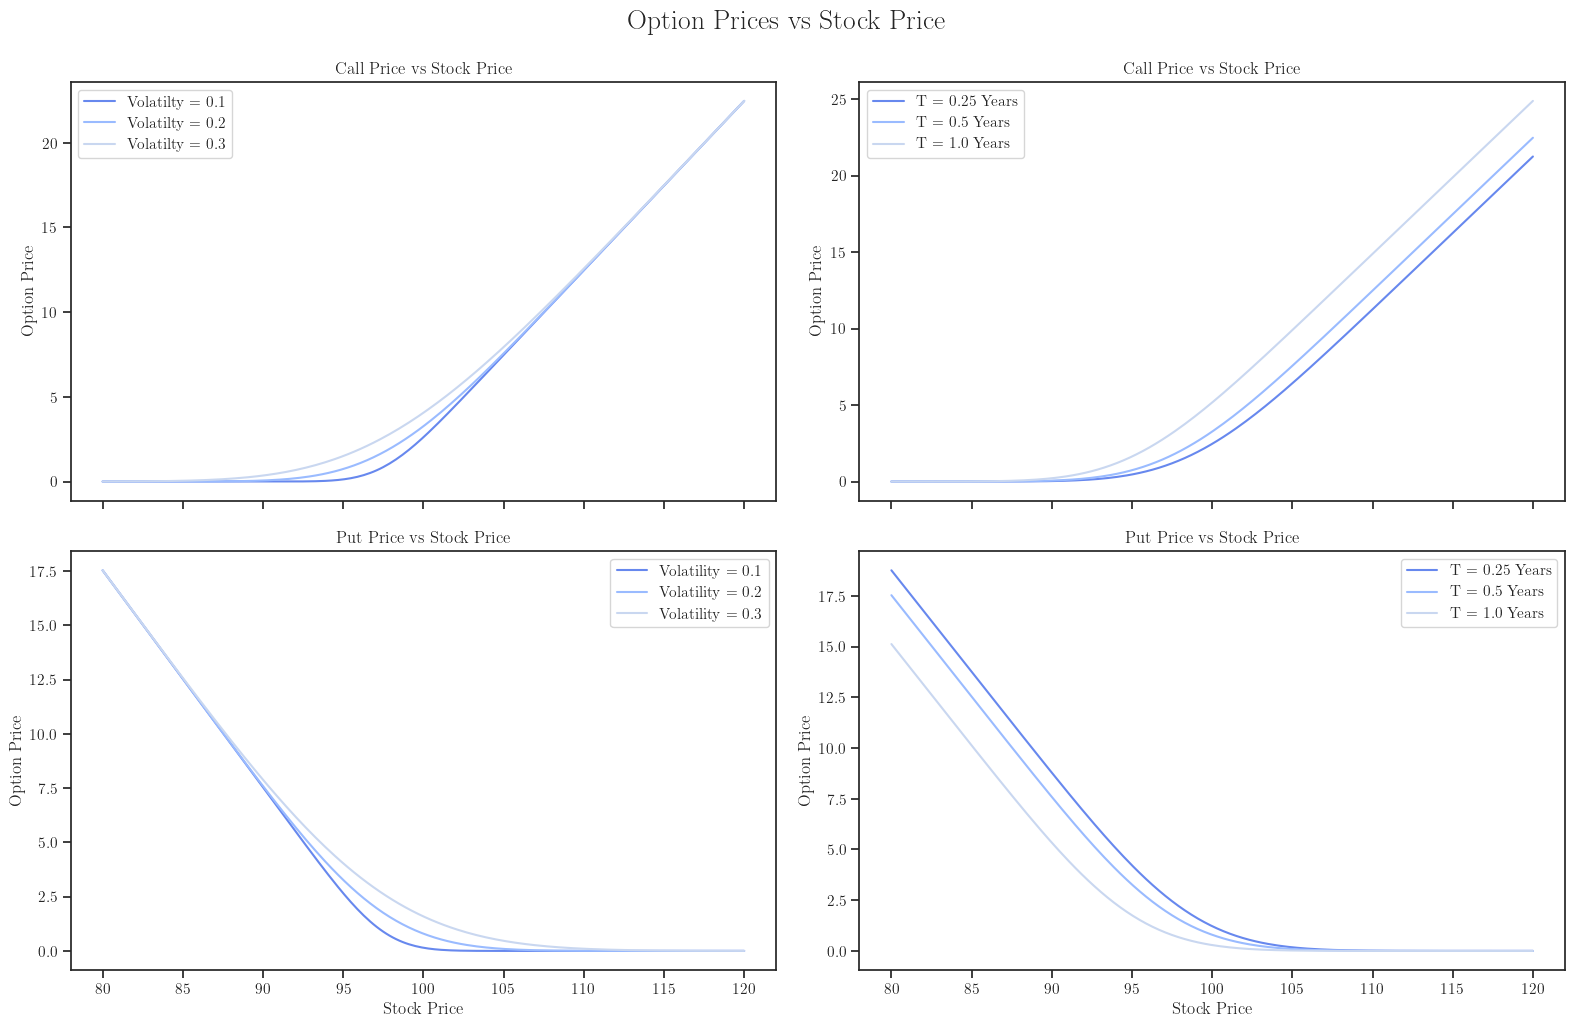

In [ ]:
"""Call and Put Option Payoff Profile Plots"""

K = 100
S_vals = np.linspace(0.8 * K, 1.2 * K, 200)
volatilities = [0.1, 0.2, 0.3]
time_to_maturities = [0.25, 0.5, 1.0]

fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for sigma in volatilities:
    deltas = [bs_call(S, K, 0.05, 0.5, sigma) for S in S_vals]
    axs[0, 0].plot(S_vals, deltas, label=f'Volatilty = {sigma}')
axs[0, 0].set_title("Call Price vs Stock Price")
axs[0, 0].set_ylabel("Option Price")
axs[0, 0].legend()

for T in time_to_maturities:
    gammas = [bs_call(S, K, 0.05, T, 0.2) for S in S_vals]
    axs[0, 1].plot(S_vals, gammas, label=f'T = {T} Years')
axs[0, 1].set_title("Call Price vs Stock Price")
axs[0, 1].set_ylabel("Option Price")
axs[0, 1].legend()

for sigma in volatilities:
    deltas = [bs_put(S, K, 0.05, 0.5, sigma) for S in S_vals]
    axs[1, 0].plot(S_vals, deltas, label=f'Volatility = {sigma}')
axs[1, 0].set_title("Put Price vs Stock Price")
axs[1, 0].set_xlabel("Stock Price")
axs[1, 0].set_ylabel("Option Price")
axs[1, 0].legend()

for T in time_to_maturities:
    gammas = [bs_put(S, K, 0.05, T, 0.2) for S in S_vals]
    axs[1, 1].plot(S_vals, gammas, label=f'T = {T} Years')
axs[1, 1].set_title("Put Price vs Stock Price")
axs[1, 1].set_xlabel("Stock Price")
axs[1, 1].set_ylabel("Option Price")
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle("Option Prices vs Stock Price", fontsize=20, y=1.03)
plt.show()